In [1]:
import math
import torch
from torch import nn
import matplotlib.pyplot as plt

In [39]:
class SinusoidalPosEmb(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, x):
        device = x.device
        half_dim = self.dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=device) * -emb)
        emb = x[:, None] * emb[None, :]
        emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
        return emb

In [40]:
class SinusoidalEmbeddingBlock(nn.Module):
    def __init__(self, embedding_size: int, max_period: int=10000):
        super().__init__()
        self.embedding_size = embedding_size
        self.max_period = max_period
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        half_size = self.embedding_size // 2
        freqs = torch.exp(
            math.log(self.max_period) * torch.arange(start=0, end=half_size, dtype=torch.float32) / half_size
        ).to(device=x.device)
        args = x[:, None].float() * freqs[None]
        embedding = torch.cat([torch.sin(args), torch.cos(args)], dim=-1)
        return embedding

In [41]:
sinEmbed = SinusoidalPosEmb(64)
mysinEmbed = SinusoidalEmbeddingBlock(64)

In [42]:
t = torch.arange(0, 1000, dtype=torch.float32).reshape(-1,)

In [43]:
emb = sinEmbed(t)
myemb = mysinEmbed(t / 1000.)

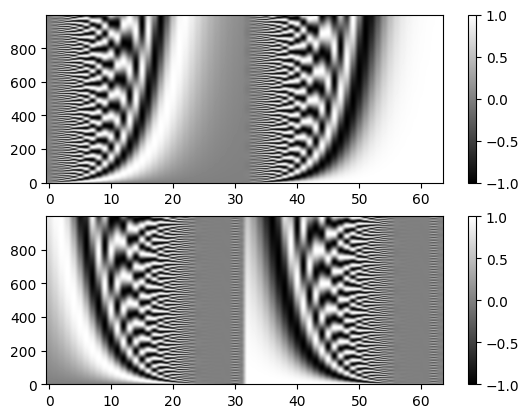

In [45]:
plt.subplot(2, 1, 1)
plt.imshow(emb, aspect='auto', origin='lower', cmap='gray')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.imshow(myemb, aspect='auto', origin='lower', cmap='gray')
plt.colorbar()